In [1]:
import numpy as np
from matplotlib import pyplot as plt
from minerals_def import olivineObj 

Olivine


In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')
from matplotlib import rc, rcParams
# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to ‘Computer Modern’
rc('font',**{'size':16, 'family':'serif','serif':['Times New Roman']})
#import matplotlib.patheffects as path_effects
# Make use of TeX\ufeff
#rc(‘text’,usetex=True)
# Change all fonts to ‘Computer Modern’
#rc(‘font’,**{‘size’:16, ‘family’:‘serif’,‘serif’:[‘Times New Roman’]})
rc('xtick.major', size=5, pad=5)
rc('xtick', labelsize=16)
rc('ytick.major', size=5, pad=5)
rc('ytick', labelsize=16)

# Define mineral object

In [9]:
mineral = olivineObj
olivineObj

In [10]:
olivineObj.atomic_masses

[15.999, 28.0855, 55.845, 24.305]

# Dark matter recoil spectrum

In [3]:
from WIMPS.compute_wimps import get_drder, get_drder_one

## On individual elements

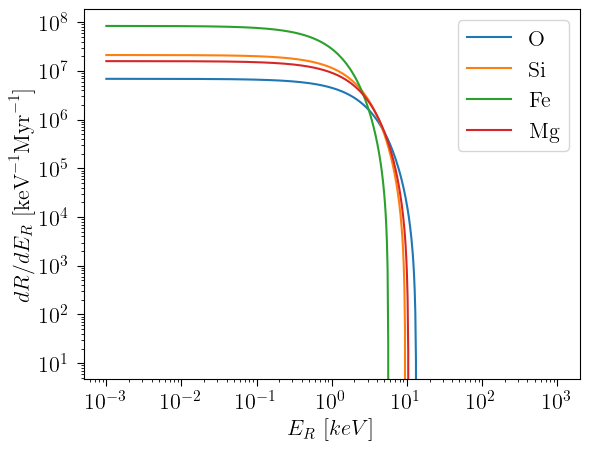

In [23]:
# Compute dR/dE_R of Oxygen by WIMP dark matter
Er = np.logspace(-3, 3, 700)
mx = 5 # GeV
sigma = 1e-42 # 1/cm^2
A_in_olivine = olivineObj.atomic_masses
elements_in_olivine = olivineObj.composition

for i, A in enumerate(A_in_olivine):
    Er, dRdE = get_drder_one(Er, A,mx,sigma, frac=0,spin='SI')
    plt.loglog(Er, dRdE[0], label=elements_in_olivine[i])
    plt.legend()

plt.xlabel(r'$E_R\  [keV]$')
plt.ylabel(r'$dR/dE_R\ [\mathrm{keV}^{-1} \mathrm{Myr}^{-1}]$')

plt.show()

## In Olivine

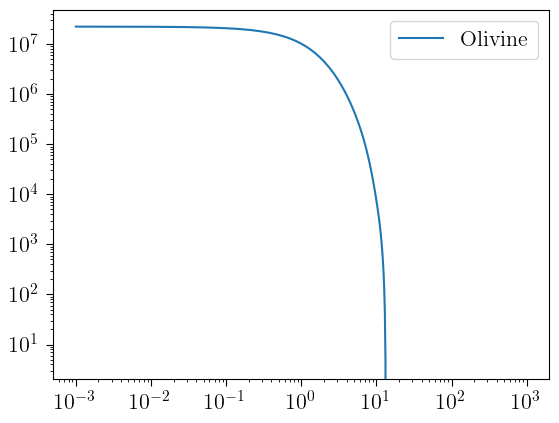

In [24]:
Er = np.logspace(-3, 3, 700)
mx = 5 # GeV
sigma = 1e-42 # 1/cm^2
A_in_olivine = olivineObj.atomic_masses
elements_in_olivine = olivineObj.composition
mass_fracs_in_olivine = olivineObj.atomic_fractions

dRdE_in_olivine = 0

for i, A in enumerate(A_in_olivine):
    Er, dRdE = get_drder_one(Er, A,mx,sigma, frac=0,spin='SI')
    dRdE_in_olivine += dRdE*mass_fracs_in_olivine[i]
    
plt.loglog(Er, dRdE_in_olivine[0], label='Olivine')
plt.legend()


# WIMP track length distributions 

In [25]:
from compute_trackSpectra import get_wimps_dRdx

In [31]:
xt_range = np.logspace(-2,3, 500)
mx = 5
sigma = 1e-42
mineral = olivineObj

dRdx_wimp_5G = get_wimps_dRdx(mx=5, sigma=1e-42, xt_range=xt_range, mineral=mineral, frac=0, spin='SI')
dRdx_wimp_50G= get_wimps_dRdx(mx=50, sigma=1e-43, xt_range=xt_range, mineral=mineral, frac=0, spin='SI')

dRdx_wimp_5G.shape

(1, 500)

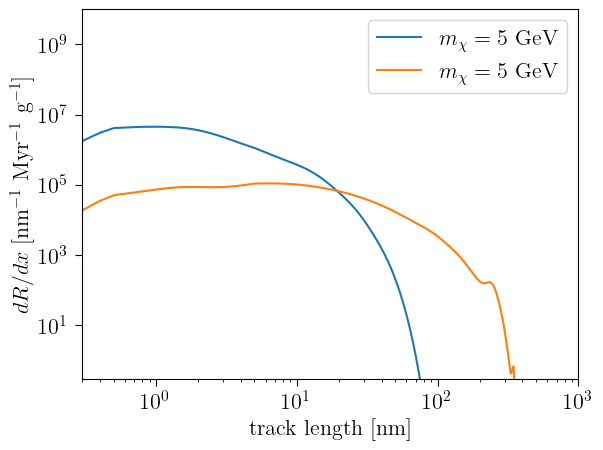

In [35]:
plt.loglog(xt_range, dRdx_wimp_5G[0], label='$m_\chi = 5 $ GeV')
plt.loglog(xt_range, dRdx_wimp_50G[0], label='$m_\chi = 5 $ GeV')

plt.xlim(3e-1, 1e3)
plt.ylim(3e-1, 1e10)

plt.xlabel('track length [nm]')
plt.ylabel('$dR/dx$ [nm$^{-1}$ Myr$^{-1}$ g$^{-1}$]')

plt.legend()